In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import ipywidgets
plt.rcParams["figure.figsize"] = (12,10)

In [3]:
scan_file = h5py.File("data-readonly/single_dicom.h5", "r")
scan = scan_file["/scan"].value

In [4]:
scan.shape

(36, 512, 512)

In [5]:
image = scan[19,::,::]

In [6]:
image.shape

(512, 512)

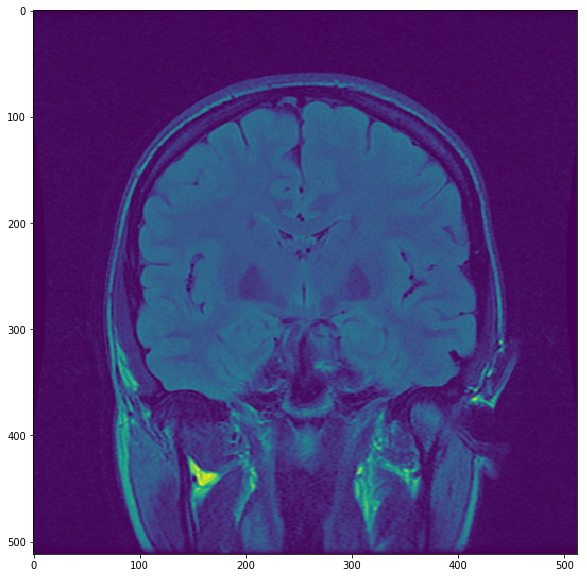

In [7]:
plt.imshow(image)

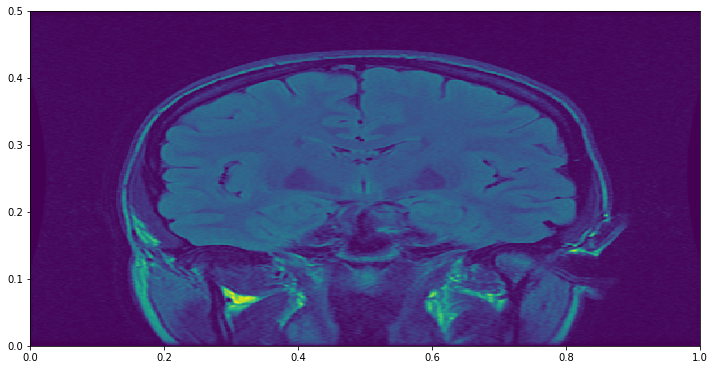

In [8]:
plt.imshow(image, extent=[0.0, 1.0, 0., 0.5])

In [9]:
image.max()

1268.0

In [10]:
image2 = image.copy()
image2[:50, :50] = 1268

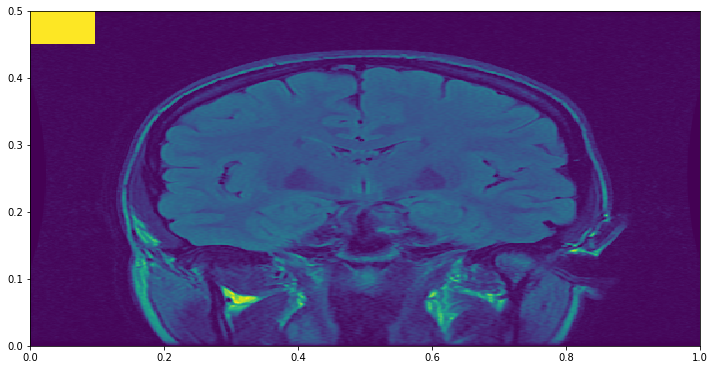

In [11]:
plt.imshow(image2, extent = [0, 1, 0., 0.5])

In [12]:
scan.min(), scan.max()

(0.0, 1747.0)

In [13]:
from matplotlib.colors import LogNorm, PowerNorm

In [14]:
def make_plot(position, gamma, cmap):
    image = scan[position, :, :]
    plt.imshow(image, cmap=cmap, norm=PowerNorm(gamma))
    plt.colorbar()
    plt.clim(1, 1747.0)

In [15]:
ipywidgets.interact(make_plot, position = (0, 35, 1), gamma = (0.0, 1.0, 0.01),
                   cmap = ["viridis", "magma", "plasma", "inferno", "jet",
                          "doom", "dusk", "arbre", "octarine"]
                   )

interactive(children=(IntSlider(value=17, description='position', max=35), FloatSlider(value=0.5, description='gamma', max=1.0, step=0.01), Dropdown(description='cmap', options=('viridis', 'magma', 'plasma', 'inferno', 'jet', 'doom', 'dusk', 'arbre', 'octarine'), value='viridis'), Output()), _dom_classes=('widget-interact',))

<function __main__.make_plot>

In [16]:
arr = np.fromfile("data-readonly/michigan_lld/michigan_lld.flt", dtype="f4")
lmi = arr.reshape((4201, 5365), order="F").transpose()
lake = np.ma.MaskedArray(lmi, mask = (lmi == -9999))

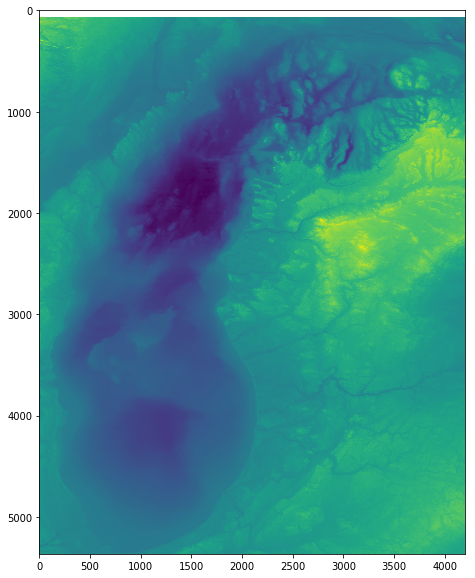

In [17]:
plt.imshow(lake)

In [18]:
lake.min()

-275.89001

In [19]:
lake.max()

351.94348

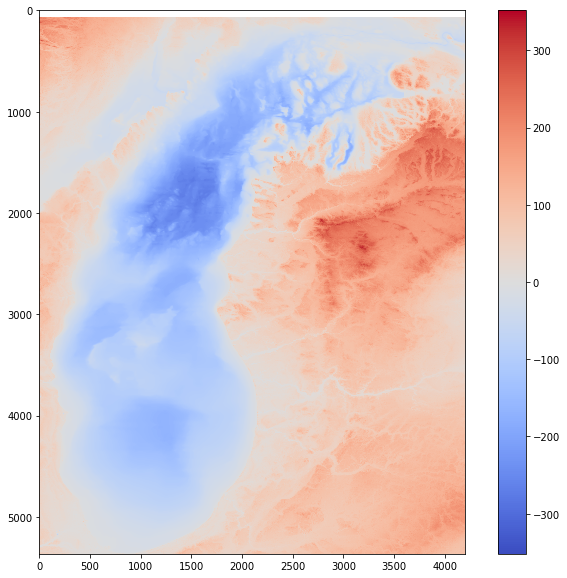

In [20]:
plt.imshow(lake, cmap="coolwarm")
plt.colorbar()
val = max(np.abs(lake.min()), lake.max())
plt.clim(-val, val)